# Python Team Porject
### Group member: Boduo Lin, Qiaochu Ma, Meng Zhang, Jiaren Han, Wenyuan Pan

## 1. Data Preprocessing

In [291]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Concatenate two files

In [294]:
fuel1 = pd.read_csv('Fuel_Level_Part_1.csv')
fuel2 = pd.read_csv('Fuel_Level_Part_2.csv')
display(fuel1)
display(fuel2)

,Tank ID,Fuel Level,Time stamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55
...,...,...,...
885146,T 31,33770.0,8/15/2019 22:52
885147,T 31,33770.0,8/15/2019 23:08
885148,T 31,33770.0,8/15/2019 23:22
885149,T 31,33770.0,8/15/2019 23:37


,Tank ID,Fuel_Level,Timestamp
0,T 32,22327,1/1/2017 0:05
1,T 20,25215,1/1/2017 0:07
2,T 10,25700,1/1/2017 0:09
3,T 11,25685,1/1/2017 0:10
4,T 14,27138,1/1/2017 0:10
...,...,...,...
974504,T 32,27619,8/15/2019 23:53
974505,T 22,31548,8/15/2019 23:57
974506,T 16,53492,8/15/2019 23:57
974507,T 18,27081,8/15/2019 23:57


In [295]:
fuel2.rename(columns= {'Fuel_Level' : 'Fuel Level'},inplace= True)
fuel1.rename(columns = {'Time stamp' : 'Timestamp'},inplace= True)

In [296]:
fuel_level = pd.concat([fuel1,fuel2])
display(fuel_level)

,Tank ID,Fuel Level,Timestamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55
...,...,...,...
974504,T 32,27619.0,8/15/2019 23:53
974505,T 22,31548.0,8/15/2019 23:57
974506,T 16,53492.0,8/15/2019 23:57
974507,T 18,27081.0,8/15/2019 23:57


#### Merge three datasets

In [298]:
tanks = pd.read_csv('Tanks.csv')
locations = pd.read_csv('Locations.csv')
invoices = pd.read_csv ('invoices.csv')

In [299]:
merge1= pd.merge(tanks, locations, left_on="Tank Location", right_on="Gas Station Location", how="inner")
gas_station = pd.merge(merge1, invoices, left_on="Gas Station Location", right_on="Invoice Gas Station Location", how="inner")
display(gas_station.head())
# We named the dataset that includes all three data as 'gas_station'

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10000.0,1,7570.82000,6609.600,G
1,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10001.0,1,12491.85300,9338.736,D
2,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10002.0,1,NaN,NaN,NaN
3,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10006.0,1,5670.54418,4239.216,D
4,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10007.0,1,7627.60115,6659.184,G


#### Data cleaning

<Axes: >

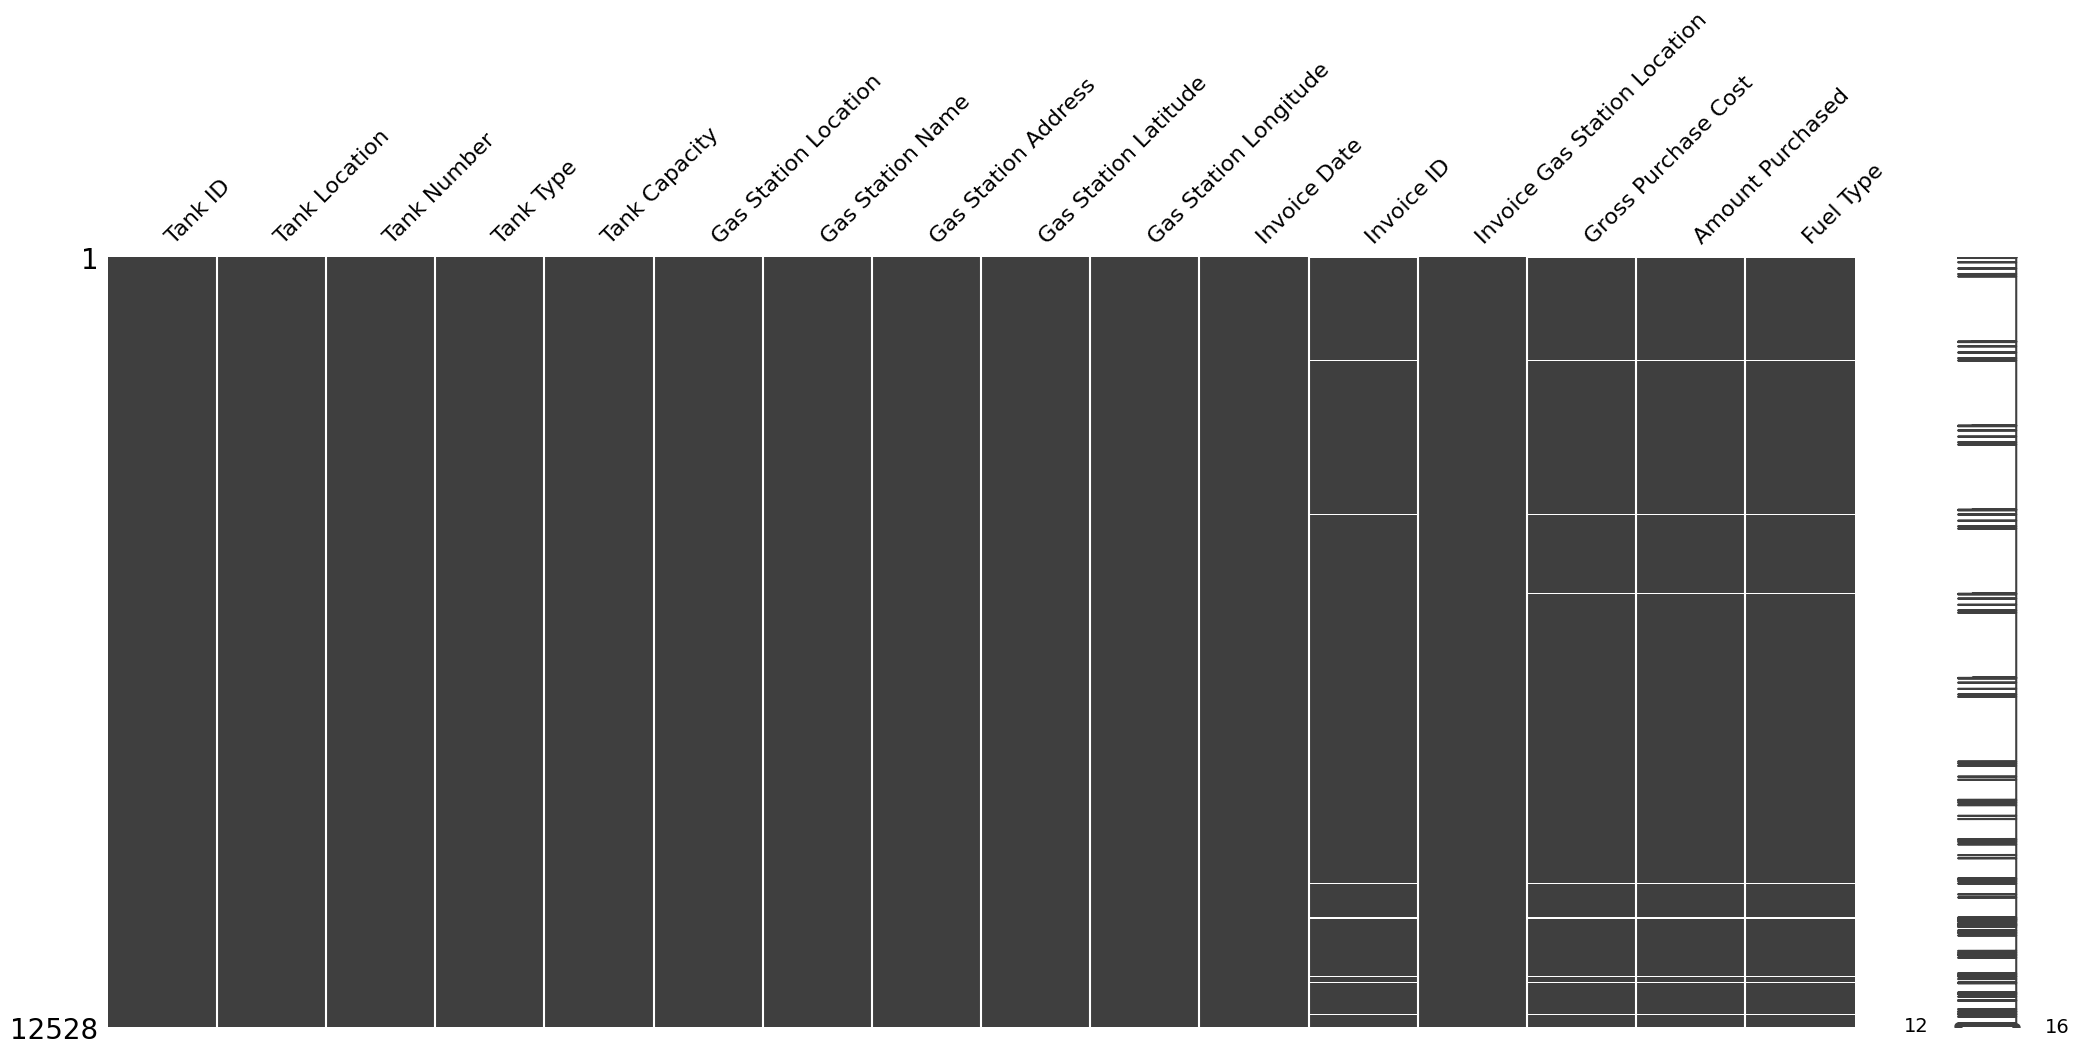

In [306]:
# Data cleaning for gas_station
msno.matrix(gas_station)

In [307]:
gas_station.isnull().sum()

Tank ID                           0
Tank Location                     0
Tank Number                       0
Tank Type                         0
Tank Capacity                     0
Gas Station Location              0
Gas Station Name                  0
Gas Station Address               0
Gas Station Latitude              0
Gas Station Longitude             0
Invoice Date                      0
Invoice ID                      110
Invoice Gas Station Location      0
Gross Purchase Cost             116
Amount Purchased                116
Fuel Type                       116
dtype: int64

In [308]:
gas_station = gas_station.dropna()
gas_station.head()
# we've dropped 116 rows with missing data, now they all have full data sources.

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10000.0,1,7570.82000,6609.600,G
1,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10001.0,1,12491.85300,9338.736,D
3,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10006.0,1,5670.54418,4239.216,D
4,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10007.0,1,7627.60115,6659.184,G
5,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10008.0,1,32175.98500,26704.960,G


<Axes: >

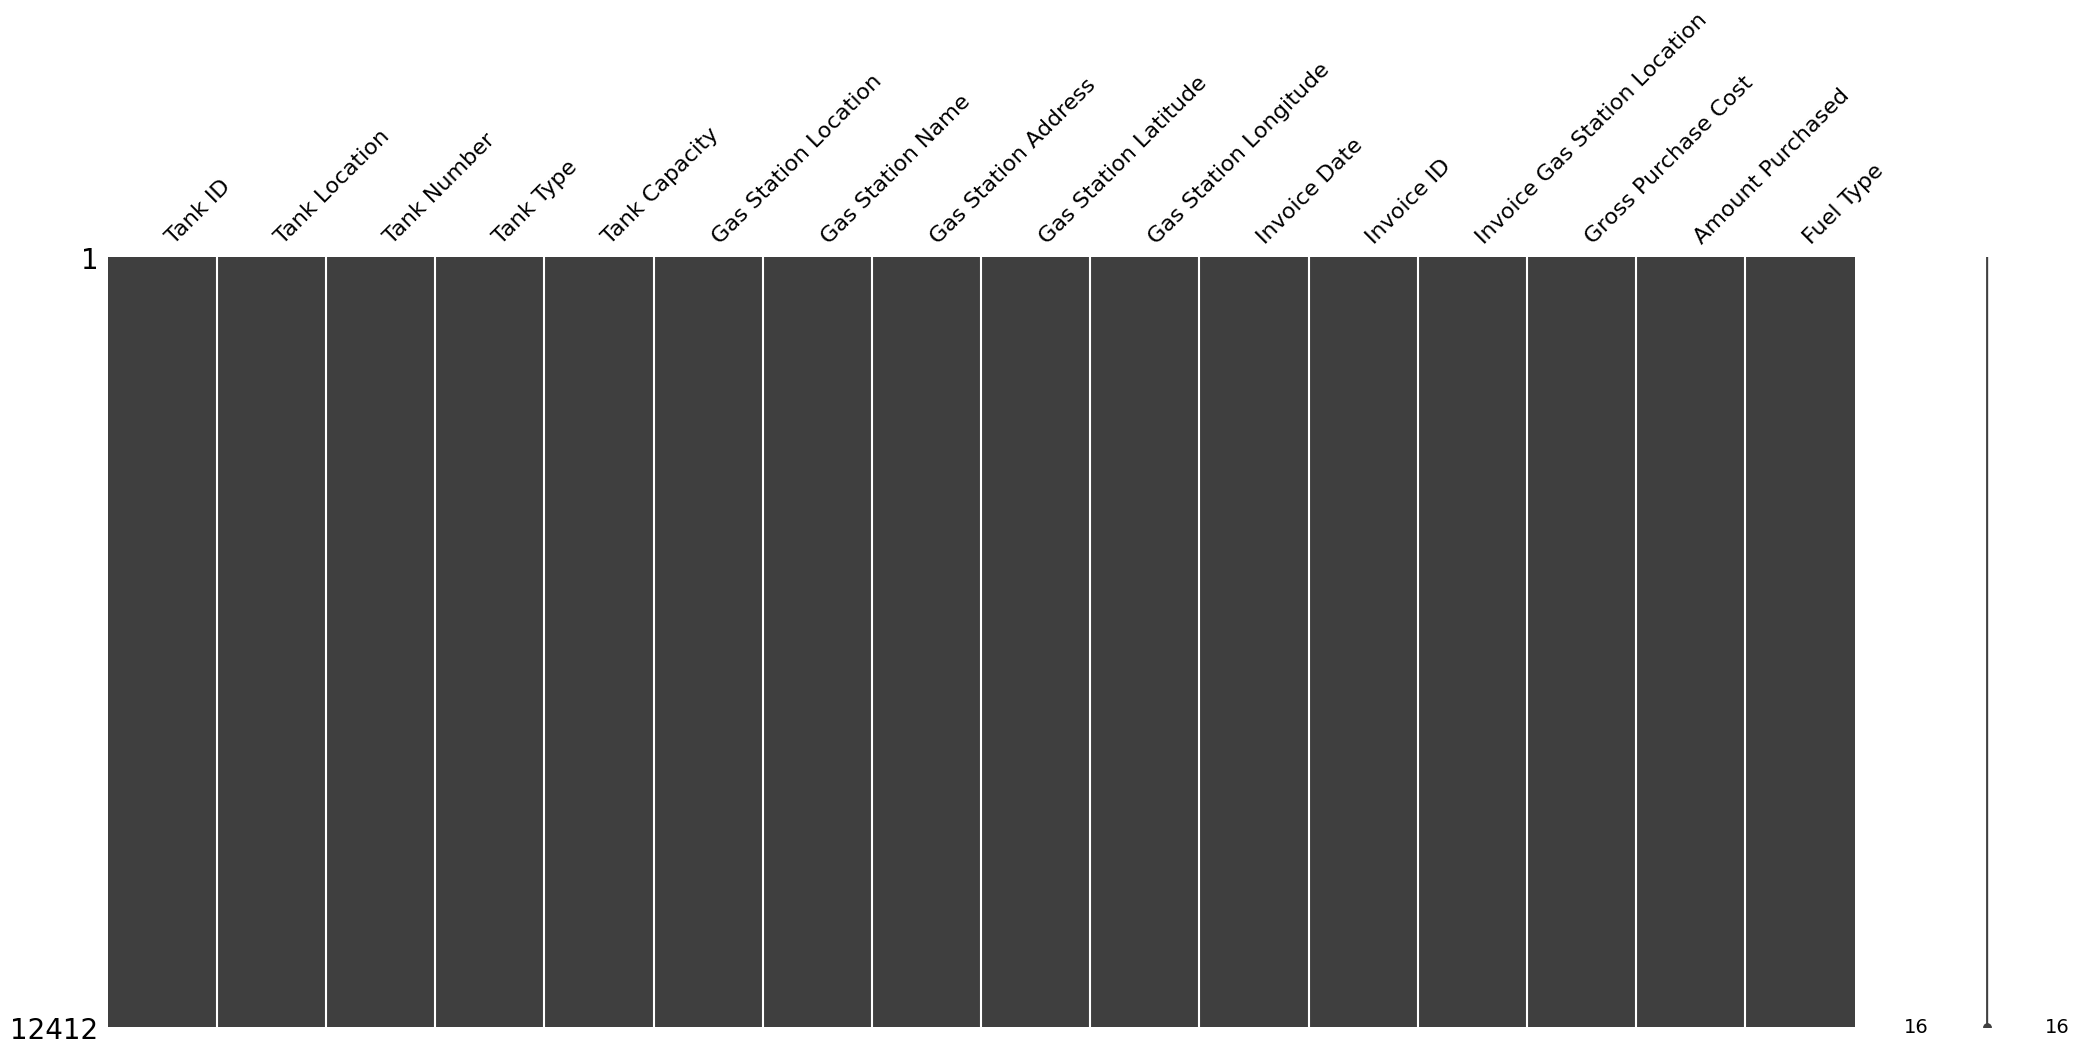

In [309]:
msno.matrix(gas_station)

#### data cleaning for fuel_level

<Axes: >

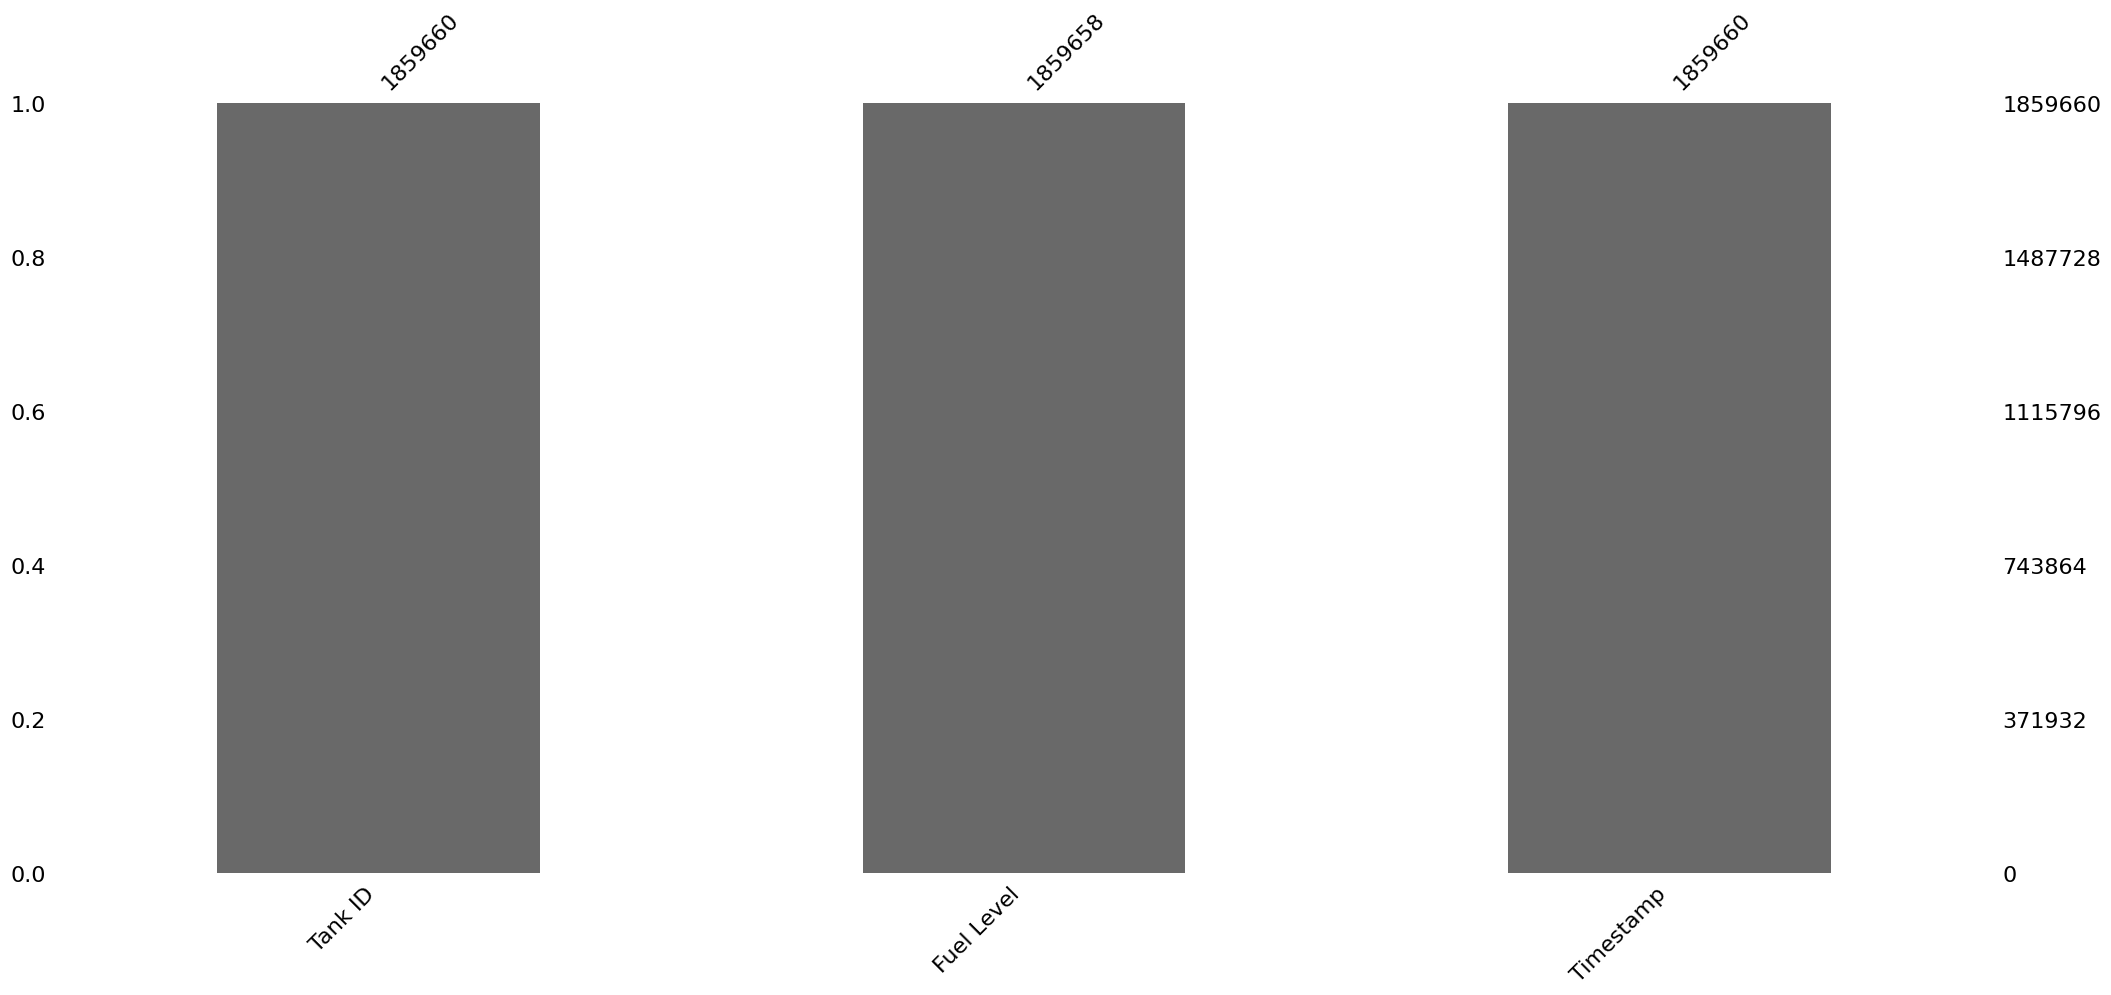

In [313]:
msno.bar(fuel_level)

In [315]:
fuel_level[fuel_level.isnull().any(axis=1)]

,Tank ID,Fuel Level,Timestamp
3,T12,NaN,1/1/2017 0:45
111,T12,NaN,1/2/2017 3:35


In [316]:
fuel_level = fuel_level.dropna()
display(fuel_level)
# we've dropped 2 rows with missing data, now they all have full data sources.

,Tank ID,Fuel Level,Timestamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
4,T 12,26786.0,1/1/2017 0:55
5,T 12,26748.0,1/1/2017 1:10
...,...,...,...
974504,T 32,27619.0,8/15/2019 23:53
974505,T 22,31548.0,8/15/2019 23:57
974506,T 16,53492.0,8/15/2019 23:57
974507,T 18,27081.0,8/15/2019 23:57


In [317]:
# checking whether fuel_level has duplicated data
duplicated_ID_timestamp = fuel_level[fuel_level.duplicated(subset= ['Tank ID','Timestamp'], keep= False)]
duplicated_ID_timestamp
# there are 237 rows of data that are duplicated, we need to clean them as well.

,Tank ID,Fuel Level,Timestamp
29786,T 12,20945.0,11/8/2017 11:44
29787,T 12,21347.0,11/8/2017 11:44
29788,T 12,20559.0,11/8/2017 11:59
29789,T 12,21123.0,11/8/2017 11:59
59596,T 12,24159.0,10/30/2018 23:14
...,...,...,...
804768,T 10,13700.0,3/15/2019 3:00
905504,T 18,35913.0,6/14/2019 15:13
905505,T 18,35913.0,6/14/2019 15:13
969086,T 16,62585.0,8/9/2019 15:28


In [318]:
# clean duplicated data by keeping their first existing data
fuel_level = fuel_level.drop_duplicates(subset= ['Tank ID','Timestamp'], keep= 'first').reset_index(drop= True)
display(fuel_level)
# Now, this is the fuel_level data with no missing data and duplicated data.

,Tank ID,Fuel Level,Timestamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T 12,26786.0,1/1/2017 0:55
4,T 12,26748.0,1/1/2017 1:10
...,...,...,...
1859534,T 32,27619.0,8/15/2019 23:53
1859535,T 22,31548.0,8/15/2019 23:57
1859536,T 16,53492.0,8/15/2019 23:57
1859537,T 18,27081.0,8/15/2019 23:57


### 1.1 Visualize Fuel Levels

In [321]:
# change datatype of timestamp to Datetime
fuel_level.Timestamp = pd.to_datetime(fuel_level.Timestamp)
display(fuel_level.dtypes)

Tank ID               object
Fuel Level           float64
Timestamp     datetime64[ns]
dtype: object

In [322]:
# visualize each tanks' fuel level
def visual_tank(ID):
    plt.figure(figsize= (20,4))
    plt.title(f' Fuel Level of {ID} by time')
    return sns.lineplot(data = fuel_level[fuel_level['Tank ID'] == ID],
               x = 'Timestamp',
               y = 'Fuel Level');

In [323]:
# Check unique tanks
fuel_level['Tank ID'].unique()

array(['T 12', 'T 13', 'T 15', 'T 17', 'T 19', 'T 21', 'T 23', 'T 24',
       'T 28', 'T 30', 'T 31', 'T 32', 'T 20', 'T 10', 'T 11', 'T 14',
       'T 25', 'T 16', 'T 27', 'T 26', 'T 22', 'T 18', 'T 29'],
      dtype=object)

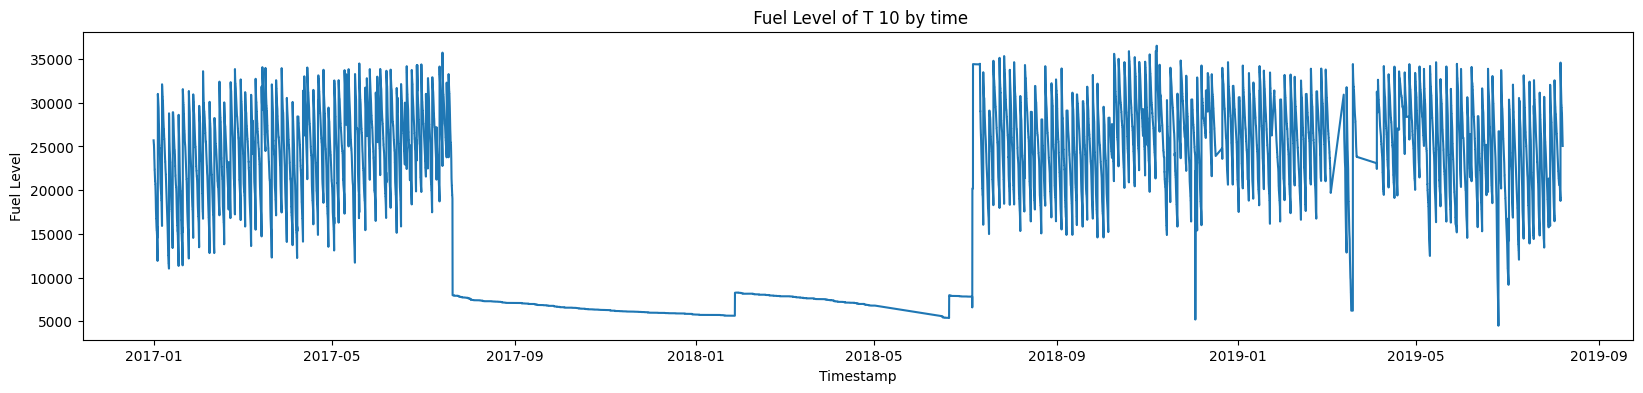

In [325]:
visual_tank('T 10');

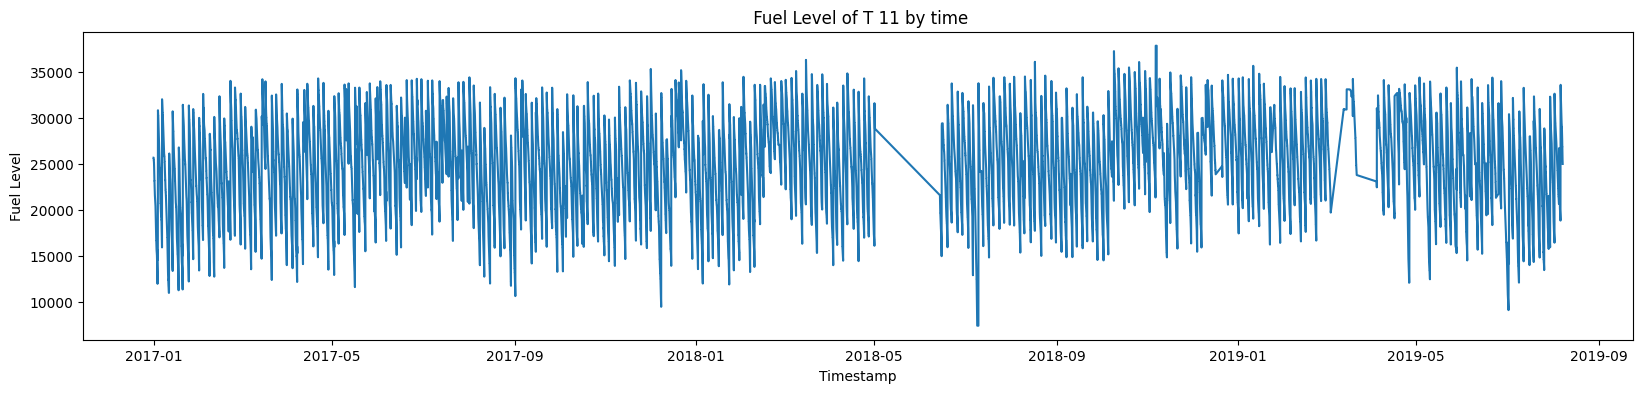

In [327]:
visual_tank('T 11');

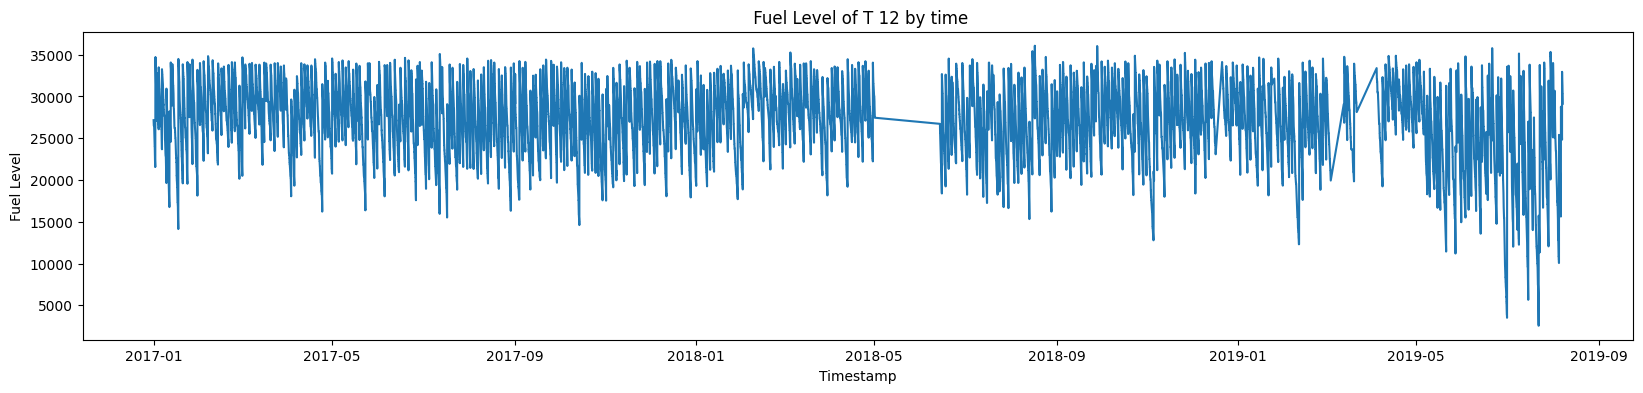

In [329]:
visual_tank('T 12');

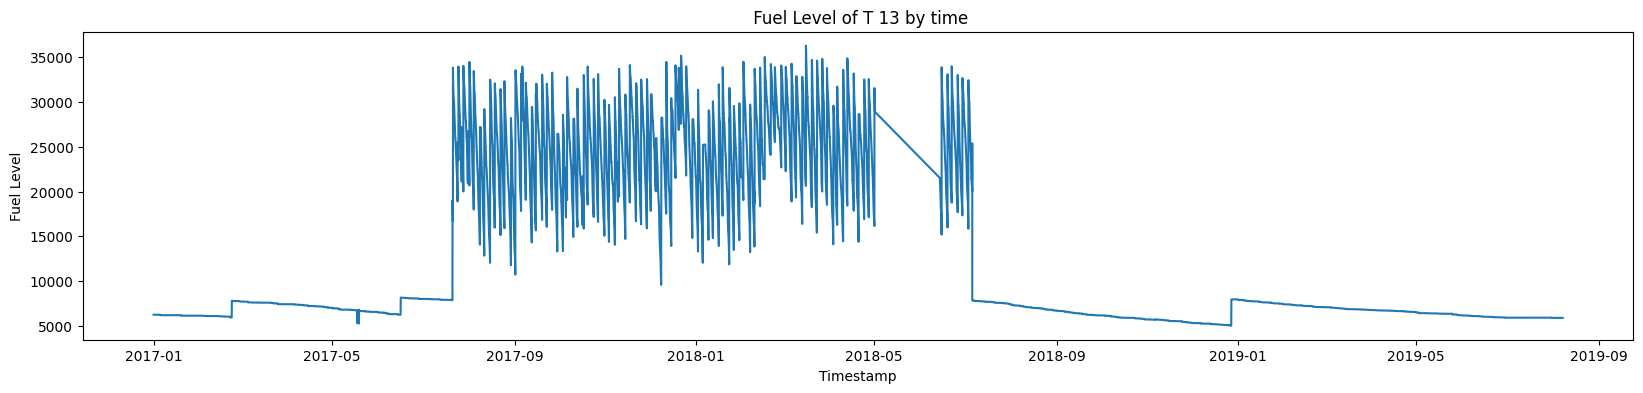

In [331]:
visual_tank('T 13');

In [ ]:
visual_tank('T 14');

In [ ]:
visual_tank('T 15');

In [ ]:
visual_tank('T 16');

In [ ]:
visual_tank('T 17');

In [ ]:
visual_tank('T 18');

In [ ]:
visual_tank('T 19');

In [ ]:
visual_tank('T 20');

In [ ]:
visual_tank('T 21');

In [ ]:
visual_tank('T 22');

In [ ]:
visual_tank('T 23');

In [ ]:
visual_tank('T 24');

In [ ]:
visual_tank('T 25');

In [ ]:
visual_tank('T 26');

In [ ]:
visual_tank('T 27');

In [ ]:
visual_tank('T 28');

In [ ]:
visual_tank('T 29');

In [ ]:
visual_tank('T 30');

In [ ]:
visual_tank('T 31');

In [ ]:
visual_tank('T 32');

In [ ]:
# find locations for each tank
tank_location = gas_station[['Tank ID', 'Gas Station Location']].drop_duplicates()
tank_location

### 1.2 Quantify Current Performance

<Axes: >

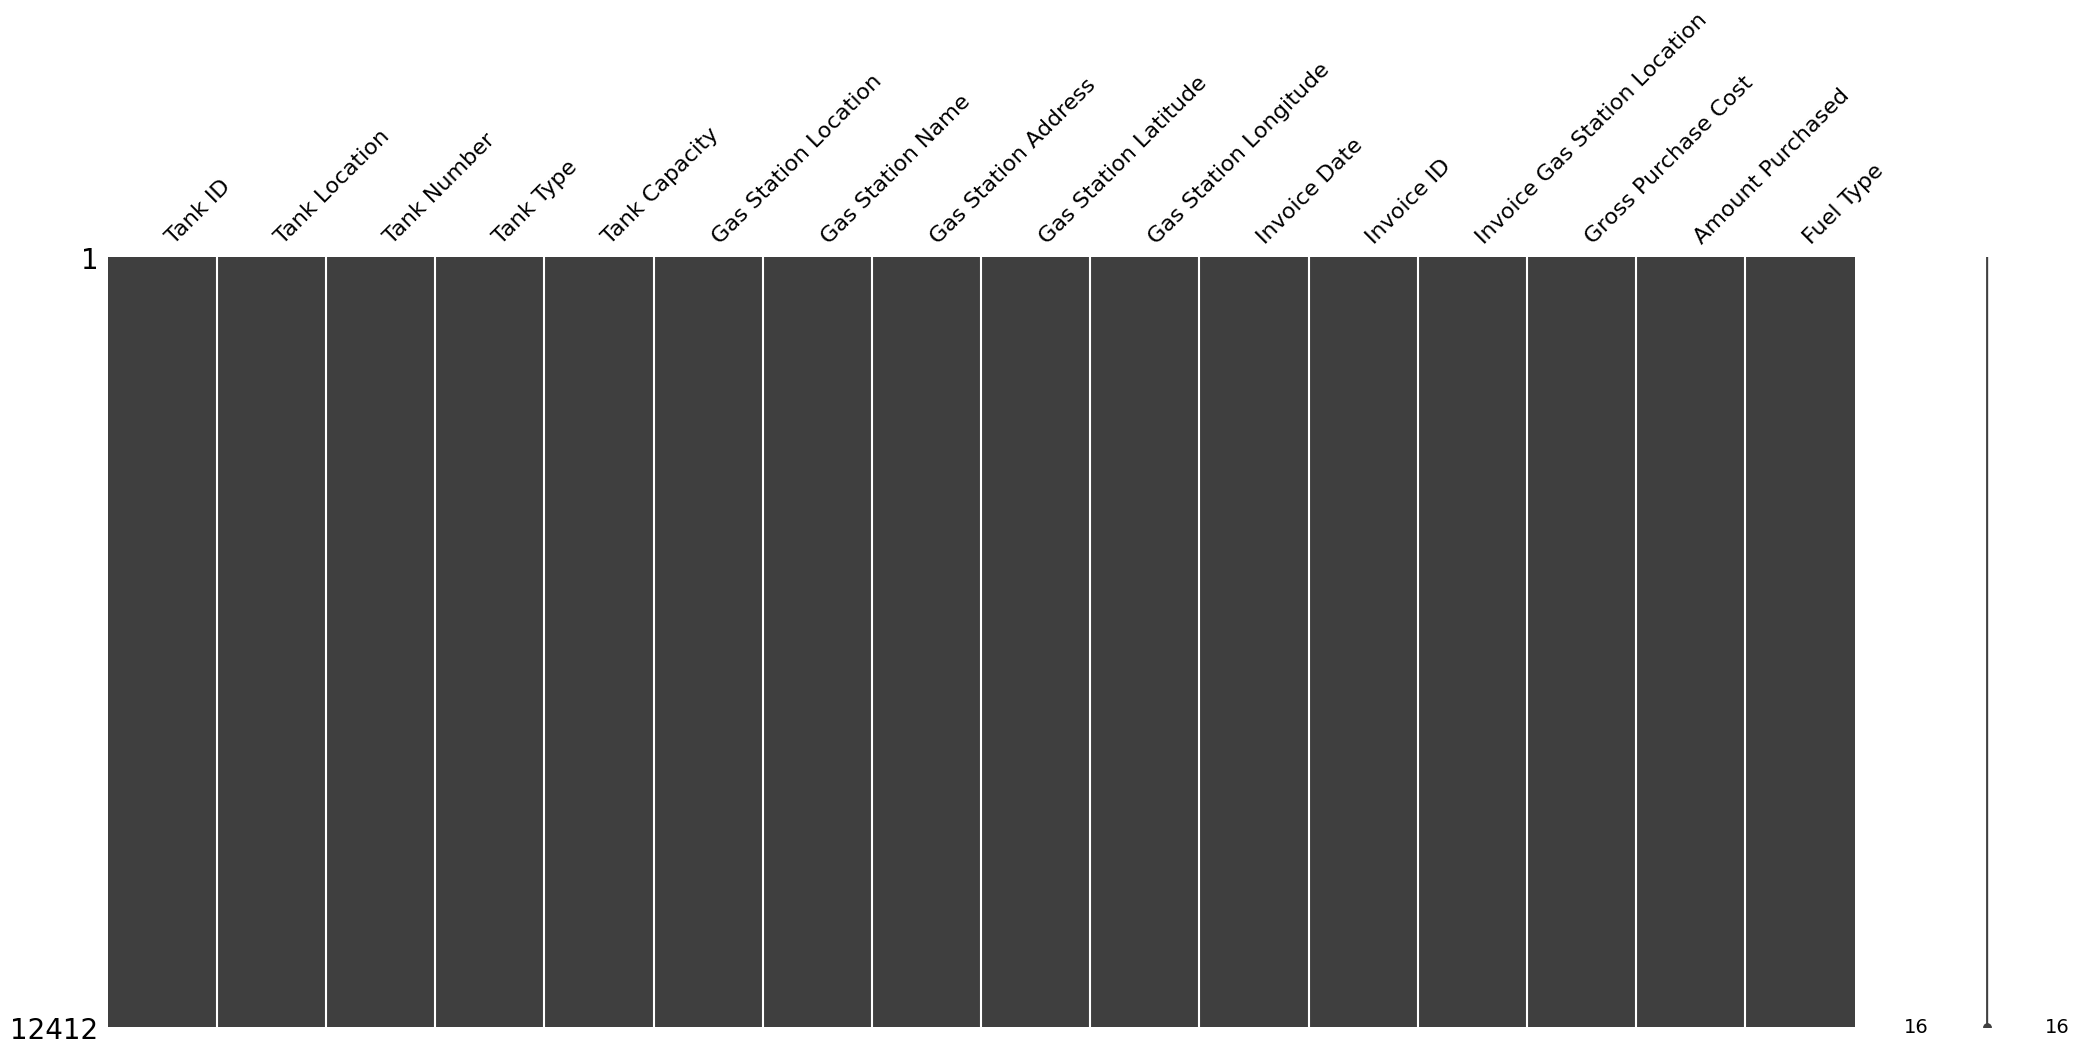

In [333]:
msno.matrix(gas_station)

In [334]:
gas_station.head()

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10000.0,1,7570.82000,6609.600,G
1,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10001.0,1,12491.85300,9338.736,D
3,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10006.0,1,5670.54418,4239.216,D
4,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10007.0,1,7627.60115,6659.184,G
5,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10008.0,1,32175.98500,26704.960,G


In [335]:
#Calculate which station creates the most orders
gas_station['Invoice Gas Station Location'].value_counts()

Invoice Gas Station Location
1    8166
2    2528
4     712
5     560
3     160
6     126
7     104
8      56
Name: count, dtype: int64

In [336]:
#Calculate the total amount of fuel purchased by each station
gas_station.groupby('Invoice Gas Station Location')['Amount Purchased'].sum().sort_values(ascending = False)

Invoice Gas Station Location
1    9.443202e+07
2    2.513365e+07
4    6.422172e+06
5    4.316894e+06
3    1.710668e+06
6    1.323930e+06
8    5.675867e+05
7    2.092902e+05
Name: Amount Purchased, dtype: float64

In [337]:
#fuel type that is purchased more by the gas stations
gas_station.groupby('Fuel Type')['Amount Purchased'].sum()

Fuel Type
D    4.916854e+07
G    8.494767e+07
Name: Amount Purchased, dtype: float64

In [338]:
#Convert 'Invoice Date' into datetime
gas_station['Invoice Date'] = pd.to_datetime(gas_station['Invoice Date'])

In [339]:
#Add a column to extract the month of the order
gas_station['Month'] = gas_station['Invoice Date'].dt.month

#Group by 'Month' and calculate the total amount purchased for each month
monthly_purchase = gas_station.groupby('Month')['Amount Purchased'].sum().reset_index()

#Sort by the 'Amount Purchased' to find the month with the highest purchase
max_purchase_month = monthly_purchase.sort_values(by='Amount Purchased', ascending=False)

In [361]:
def calculate_discount(Amount_Purchased):
    """
    Purchase quantity (liters)	Discount per liter
    0-15000	    0
    15000-25000	2 cents
    25000-40000	3 center
    40000+	    4 cents
    
    """
    if Amount_Purchased<=15000:
        discount = 0
    elif 15000<Amount_Purchased<=25000:
        discount = Amount_Purchased*0.02
    elif 25000<Amount_Purchased<=40000:
        discount = Amount_Purchased*0.03
    else:
        discount = Amount_Purchased*0.04

    return discount

gas_station['discount'] = gas_station['Amount Purchased'].apply(calculate_discount)

In [363]:
monthly_purchase

,Month,Amount Purchased
0,1,1.389698e+07
1,2,1.205851e+07
2,3,1.127692e+07
3,4,1.044422e+07
4,5,1.222282e+07
5,6,1.216753e+07
6,7,1.378019e+07
7,8,1.146443e+07
8,9,1.004506e+07
9,10,1.020450e+07


In [365]:
gas_station.head()

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type,Month,discount
0,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,2017-01-02,10000.0,1,7570.82000,6609.600,G,1,0.0000
1,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,2017-01-02,10001.0,1,12491.85300,9338.736,D,1,0.0000
3,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,2017-01-03,10006.0,1,5670.54418,4239.216,D,1,0.0000
4,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,2017-01-03,10007.0,1,7627.60115,6659.184,G,1,0.0000
5,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,2017-01-03,10008.0,1,32175.98500,26704.960,G,1,801.1488


In [367]:
#The total discount amount for each gas station
gas_station.groupby('Invoice Gas Station Location')['discount'].sum().sort_values(ascending = False)

Invoice Gas Station Location
1    1.143524e+06
2    4.118529e+04
6    4.385685e+03
3    3.910101e+03
8    2.670793e+03
4    6.867334e+02
5    0.000000e+00
7    0.000000e+00
Name: discount, dtype: float64

## 2. Recommend Improved Ordering Strategies

### 2.1 Max Discount Based on Tank Capacity

In [371]:
#Tanks
def max_discount(capacity):
    """
    Purchase quantity (liters)	Discount per liter
    0-15000	    0
    15000-25000	2 cents
    25000-40000	3 center
    40000+	    4 cents
    
    """
    if capacity<=15000:
        discount = 0
    elif 15000<capacity<=25000:
        discount = 0.02
    elif 25000<capacity<=40000:
        discount = 0.03
    else:
        discount = 0.04

    return discount

tanks['max_possible_discount_per_liter'] = tanks['Tank Capacity'].apply(max_discount)

In [373]:
tanks

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,max_possible_discount_per_liter
0,T 10,1,1,U,40000,0.03
1,T 11,1,2,U,40000,0.03
2,T 12,1,3,D,40000,0.03
3,T 13,1,4,P,40000,0.03
4,T 14,1,5,U,40000,0.03
5,T 15,1,6,D,40000,0.03
6,T 16,2,1,U,70000,0.04
7,T 17,2,2,D,40000,0.03
8,T 18,2,3,U,40000,0.03
9,T 19,2,4,D,70000,0.04


In [375]:
#Max possible discount per liter by tank type in each tank location
tanks.groupby(['Tank Location','Tank Type'])['max_possible_discount_per_liter'].max()

Tank Location  Tank Type
1              D            0.03
               P            0.03
               U            0.03
2              D            0.04
               U            0.04
3              D            0.03
               U            0.03
4              D            0.03
               U            0.03
5              D            0.02
               U            0.02
6              D            0.03
               U            0.03
7              D            0.00
               U            0.00
8              D            0.03
               U            0.03
Name: max_possible_discount_per_liter, dtype: float64

### 2.2 Calculate a 7-day inventory threshold

In [378]:
# Calculate daily consumption for each location and tank type
# Group by Gas Station Location and Fuel Type to calculate average daily consumption
daily_consumption = (
    gas_station.groupby(['Gas Station Location', 'Fuel Type'])
    .agg({'Amount Purchased': 'sum'})
    .rename(columns={'Amount Purchased': 'Total_Consumption'})
    .reset_index()
)
daily_consumption['Avg_Daily_Consumption'] = daily_consumption['Total_Consumption'] / 30  # Assuming a 30-day month

# Calculate the 7-day inventory threshold
daily_consumption['7_Day_Threshold'] = daily_consumption['Avg_Daily_Consumption'] * 7
daily_consumption['7_Day_Threshold']

0     6.821441e+06
1     1.521270e+07
2     3.230173e+06
3     2.634346e+06
4     2.015137e+05
5     1.976420e+05
6     7.618186e+05
7     7.366883e+05
8     3.788092e+05
9     6.284660e+05
10    3.824097e+04
11    2.706761e+05
12    5.171727e+03
13    4.366265e+04
14    3.549039e+04
15    9.694651e+04
Name: 7_Day_Threshold, dtype: float64

In [388]:
daily_consumption

,Gas Station Location,Fuel Type,Total_Consumption,Avg_Daily_Consumption,7_Day_Threshold
0,1,D,2.923475e+07,9.744916e+05,6.821441e+06
1,1,G,6.519727e+07,2.173242e+06,1.521270e+07
2,2,D,1.384360e+07,4.614533e+05,3.230173e+06
3,2,G,1.129006e+07,3.763352e+05,2.634346e+06
4,3,D,8.636302e+05,2.878767e+04,2.015137e+05
5,3,G,8.470373e+05,2.823458e+04,1.976420e+05
6,4,D,3.264937e+06,1.088312e+05,7.618186e+05
7,4,G,3.157236e+06,1.052412e+05,7.366883e+05
8,5,D,1.623468e+06,5.411560e+04,3.788092e+05
9,5,G,2.693426e+06,8.978085e+04,6.284660e+05


### 2.3 Compute potential savings

In [381]:
## Analyze invoices for potential savings with tiered discounts
def calculate_discount(amount):
    if amount < 15000:
        return 0
    elif amount <= 25000:
        return 0.02  # 2 cents per liter
    elif amount <= 40000:
        return 0.03  # 3 cents per liter
    else:
        return 0.04  # 4 cents per liter

gas_station['Discount_per_Liter'] = gas_station['Amount Purchased'].apply(calculate_discount)
gas_station['Potential_Savings'] = gas_station['Amount Purchased'] * gas_station['Discount_per_Liter']

In [383]:
# Aggregate potential savings and costs
invoice_summary = (
    gas_station.groupby(['Gas Station Location', 'Fuel Type'])
    .agg({
        'Gross Purchase Cost': 'sum',
        'Amount Purchased': 'sum',
        'Potential_Savings': 'sum'
    })
    .reset_index()
)

In [385]:
display(invoice_summary)

,Gas Station Location,Fuel Type,Gross Purchase Cost,Amount Purchased,Potential_Savings
0,1,D,3.537936e+07,2.923475e+07,1.408624e+04
1,1,G,7.381436e+07,6.519727e+07,1.129438e+06
2,2,D,1.606219e+07,1.384360e+07,2.704555e+04
3,2,G,1.216001e+07,1.129006e+07,1.413974e+04
4,3,D,9.859555e+05,8.636302e+05,6.388794e+02
5,3,G,8.946589e+05,8.470373e+05,3.271222e+03
6,4,D,3.935123e+06,3.264937e+06,6.867334e+02
7,4,G,3.461545e+06,3.157236e+06,0.000000e+00
8,5,D,1.989362e+06,1.623468e+06,0.000000e+00
9,5,G,2.975378e+06,2.693426e+06,0.000000e+00


## 3. Identify the Best Day for Fuel Orders

In [408]:
# 1. Read the Invoices.csv file
invoices_df = pd.read_csv("Invoices.csv")

In [410]:
# 2. Convert Invoice Date to a datetime object
invoices_df["Invoice Date"] = pd.to_datetime(
    invoices_df["Invoice Date"], 
    format="%m/%d/%Y", 
    errors="coerce"
)

In [412]:
# 3. Calculate price per liter: Gross Purchase Cost / Amount Purchased
invoices_df["Price_per_Liter"] = (
    invoices_df["Gross Purchase Cost"] / invoices_df["Amount Purchased"]
)

In [414]:
# 4. Extract the day of week (e.g., Monday, Tuesday, etc.)
invoices_df["Day_of_Week"] = invoices_df["Invoice Date"].dt.day_name()

In [416]:
# 5. Group by day of week and find the average price per liter
avg_price_by_day = invoices_df.groupby("Day_of_Week")["Price_per_Liter"].mean().reset_index()

In [418]:
# order days Monday → Sunday if desired
day_order = {
    "Monday": 0, "Tuesday": 1, "Wednesday": 2, 
    "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6
}
avg_price_by_day["Day_Index"] = avg_price_by_day["Day_of_Week"].map(day_order)
avg_price_by_day.sort_values("Day_Index", inplace=True)

In [420]:
# 6. Identify which day has the lowest average price
cheapest_day_row = avg_price_by_day.loc[avg_price_by_day["Price_per_Liter"].idxmin()]
cheapest_day = cheapest_day_row["Day_of_Week"]
lowest_price = cheapest_day_row["Price_per_Liter"]

print(f"Cheapest day of the week: {cheapest_day}")
print(f"Average price on that day: ${lowest_price:.4f} per liter")

Cheapest day of the week: Saturday
Average price on that day: $1.0721 per liter


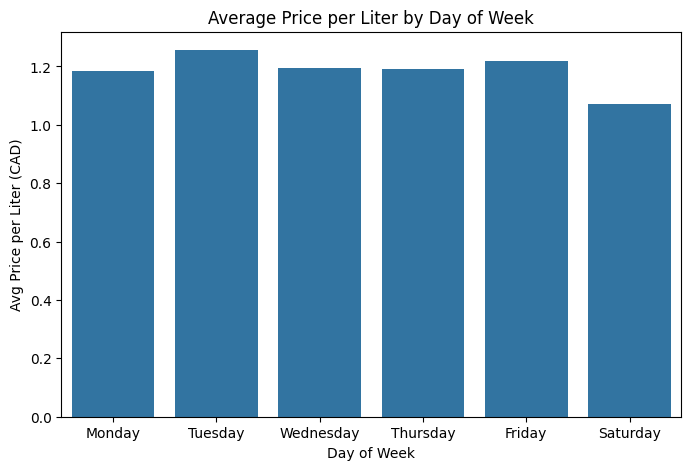

In [422]:
# 7. visualize average price per liter by day of week
plt.figure(figsize=(8,5))
sns.barplot(
    x="Day_of_Week", 
    y="Price_per_Liter", 
    data=avg_price_by_day,
    order=avg_price_by_day["Day_of_Week"]
)
plt.title("Average Price per Liter by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Avg Price per Liter (CAD)")
plt.show()

In [424]:
# 8. Theoretical savings if ALL purchases happened on the cheapest day
invoices_df["Savings_if_Cheapest"] = (
    (invoices_df["Price_per_Liter"] - lowest_price) 
    * invoices_df["Amount Purchased"]
)
total_savings = invoices_df["Savings_if_Cheapest"].sum()

print(f"Total potential savings if all orders were made on {cheapest_day}: "
      f"${total_savings:,.2f}")

Total potential savings if all orders were made on Saturday: $2,125,200.17


## 4. Evaluate the Feasibility of Adding Tanks

### 4.1 Assumption

In [390]:
# Set threshold and cost for adding new tanks
threshold = 0.85  # Consider adding new tanks if utilization exceeds 85%
tank_cost = 50000  # Cost per tank (CAD)
inflation_rate = 0.025  # Annual inflation rate 0.025
growth_rate = 0.05  # Annual fuel demand growth rate
years = 5  # Analysis period

### 4.2 Utilization Rate

In [393]:
# Calculate utilization rate
current_capacity = tanks.groupby('Tank Location')['Tank Capacity'].sum()
total_purchase = invoices.groupby('Invoice Gas Station Location')['Amount Purchased'].sum()
usage_ratio = total_purchase / current_capacity

### 4.3 High-risk gas stations

In [396]:
# Identify high-risk gas stations
high_risk_stations = usage_ratio[usage_ratio > threshold].reset_index()
high_risk_stations.columns = ['Tank Location', 'Usage Ratio']

### 4.4 Calculate potential savings and ROI

In [399]:
# Calculate potential savings
def calculate_savings(purchase):
    if purchase <= 15000:
        return 0
    elif 15000 < purchase <= 25000:
        return purchase * 0.02
    elif 25000 < purchase <= 40000:
        return purchase * 0.03
    else:
        return purchase * 0.04
high_risk_stations['Potential Savings'] = high_risk_stations['Usage Ratio'] * total_purchase * 0.04

In [401]:
# Calculate return on investment (ROI)
def evaluate_roi(savings, cost, inflation_rate, growth_rate, years):
    total_savings = 0
    for year in range(1, years + 1):
        total_savings += savings * ((1 + growth_rate) ** year) / ((1 + inflation_rate) ** year)
    roi = (total_savings - cost) / cost
    return total_savings, roi

In [403]:
# Evaluate high-risk gas stations
results = []
for index, row in high_risk_stations.iterrows():
    savings, roi = evaluate_roi(row['Potential Savings'], tank_cost, inflation_rate, growth_rate, years)
    results.append({
        'Station': row['Tank Location'],
        'Potential Savings (5 years)': savings,
        'ROI': roi,
        'Recommendation': 'Add Tank' if roi > 0 else 'No Need'
    })

### 4.5 Decision for adding tanks

In [406]:
# Convert results to DataFrame for output
results_df = pd.DataFrame(results)

# Display results

display(results_df)

# (Optional) Save results to CSV for further analysis
results_df.to_csv('tank_expansion_analysis.csv', index=False)

,Station,Potential Savings (5 years),ROI,Recommendation
0,1.0,NaN,NaN,No Need
1,2.0,9.669843e+07,1932.968635,Add Tank
2,3.0,1.926897e+07,384.379377,Add Tank
3,4.0,7.385435e+06,146.708692,Add Tank
4,5.0,2.981960e+07,595.391926,Add Tank
5,6.0,2.276780e+06,44.535604,Add Tank
6,7.0,9.934388e+05,18.868776,Add Tank
7,8.0,7.985636e+04,0.597127,Add Tank
